# Question 1: Probability theory, the sample and distributions

In [1]:
import sys, os, time
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm
from scipy.spatial.distance import pdist, squareform
import random
import pandas as pd 
import seaborn as sns #I used sns.distplot because it has more manual properties than plt.hist()
from scipy.stats import pearsonr #includes the PCC function
import networkx as nx #Graph
from itertools import groupby #to find groups of integers 
from operator import itemgetter
import matplotlib.pyplot as plt; plt.rcdefaults()
from scipy.stats import skew
from scipy.stats import norm
from itertools import product

from itertools import permutations 
from itertools import combinations 
from itertools import combinations_with_replacement  

In [2]:
#-1--- n^r (Permutations) | with repetition | with order --> (a,a)(a,b)(b,a)(b,b) 
def permutation_with_repetition(n,r):
    return n**r
def permutation_with_repetition_list(chars,r):
    results = []
    for c in product(chars, repeat = r):
        results.append(c)
    return results


#-2--- n! (Factorial) | without repetition | with order --> (a,b,c) (a,c,b) (b,a,c) (b,c,a) (c,a,b) (c,b,a) 
def factorial(n):
    if n==1: return 1
    else: return n*factorial(n-1)
def factorial_list(lst):
    return list(permutations(lst))
    
    
    
#-3--- n!/(n-r)! (Permutations) of n elements into r places | without repetition | with order --> (a,b) (a,c) (b,a) (b,c) (c,a), (c,b)
def permutation_without_repetition(n,r):
    return (factorial(n)/ (factorial(n-r)))
def permutation_without_repetition_list(lst,r):
    return list(permutations(lst,r)) 



#-4--- n!/r!(n-r)! (Combinations) of n elements into r places | without repetition | without order --> (a,b) (a,c) (b,c)
def combinations_without_repetition(n,r):
    return (factorial(n)/(factorial(r)*(factorial(n-r))))
def combinations_without_repetition_list(lst, r):
    return list(combinations(lst, r)) 



#-5--- Combinations with repetition (n,r): of n elements into r places | with repetition | without order --> (a,a) (a,b) (a,c) (b,b) (b,c) (c,c)
def combinations_with_repetition(n,r):
    return ((factorial(n+r-1))/(factorial(r)*(factorial(n-1))))
def combinations_with_repetition_list(lst,r):
    return list(combinations_with_replacement(lst, r)) 

In [3]:
#-1--- n^r (Permutations) | with repetition | with order --> (a,a)(a,b)(b,a)(b,b) 
my_list = [0,1]
r = 5 # positions
print_my_list = permutation_with_repetition_list(my_list,r)
print(print_my_list)
print("")
print(permutation_with_repetition(len(my_list),r))

counter = 0
for i in print_my_list:
    if (sum(i)==3):
        counter+=1
print("counter:",counter)

                

#counter = 0
#for k1 in range (1,7):
#    for k2 in range (1,7):
#        for k3 in range (1,7):
#            if (k1<k2 and k1<k3 and k2<k3):
#                print(k1,k2,k3)
#                counter +=1
#print(counter)

[(0, 0, 0, 0, 0), (0, 0, 0, 0, 1), (0, 0, 0, 1, 0), (0, 0, 0, 1, 1), (0, 0, 1, 0, 0), (0, 0, 1, 0, 1), (0, 0, 1, 1, 0), (0, 0, 1, 1, 1), (0, 1, 0, 0, 0), (0, 1, 0, 0, 1), (0, 1, 0, 1, 0), (0, 1, 0, 1, 1), (0, 1, 1, 0, 0), (0, 1, 1, 0, 1), (0, 1, 1, 1, 0), (0, 1, 1, 1, 1), (1, 0, 0, 0, 0), (1, 0, 0, 0, 1), (1, 0, 0, 1, 0), (1, 0, 0, 1, 1), (1, 0, 1, 0, 0), (1, 0, 1, 0, 1), (1, 0, 1, 1, 0), (1, 0, 1, 1, 1), (1, 1, 0, 0, 0), (1, 1, 0, 0, 1), (1, 1, 0, 1, 0), (1, 1, 0, 1, 1), (1, 1, 1, 0, 0), (1, 1, 1, 0, 1), (1, 1, 1, 1, 0), (1, 1, 1, 1, 1)]

32
counter: 10


In [4]:
#-2--- n! (Factorial) | without repetition | with order --> (a,b,c) (a,c,b) (b,a,c) (b,c,a) (c,a,b) (c,b,a) 
my_list = [1,2,3,4,5,6]
print_my_list = factorial_list(my_list)
print(print_my_list)
print("")
print(factorial(len(my_list)))

[(1, 2, 3, 4, 5, 6), (1, 2, 3, 4, 6, 5), (1, 2, 3, 5, 4, 6), (1, 2, 3, 5, 6, 4), (1, 2, 3, 6, 4, 5), (1, 2, 3, 6, 5, 4), (1, 2, 4, 3, 5, 6), (1, 2, 4, 3, 6, 5), (1, 2, 4, 5, 3, 6), (1, 2, 4, 5, 6, 3), (1, 2, 4, 6, 3, 5), (1, 2, 4, 6, 5, 3), (1, 2, 5, 3, 4, 6), (1, 2, 5, 3, 6, 4), (1, 2, 5, 4, 3, 6), (1, 2, 5, 4, 6, 3), (1, 2, 5, 6, 3, 4), (1, 2, 5, 6, 4, 3), (1, 2, 6, 3, 4, 5), (1, 2, 6, 3, 5, 4), (1, 2, 6, 4, 3, 5), (1, 2, 6, 4, 5, 3), (1, 2, 6, 5, 3, 4), (1, 2, 6, 5, 4, 3), (1, 3, 2, 4, 5, 6), (1, 3, 2, 4, 6, 5), (1, 3, 2, 5, 4, 6), (1, 3, 2, 5, 6, 4), (1, 3, 2, 6, 4, 5), (1, 3, 2, 6, 5, 4), (1, 3, 4, 2, 5, 6), (1, 3, 4, 2, 6, 5), (1, 3, 4, 5, 2, 6), (1, 3, 4, 5, 6, 2), (1, 3, 4, 6, 2, 5), (1, 3, 4, 6, 5, 2), (1, 3, 5, 2, 4, 6), (1, 3, 5, 2, 6, 4), (1, 3, 5, 4, 2, 6), (1, 3, 5, 4, 6, 2), (1, 3, 5, 6, 2, 4), (1, 3, 5, 6, 4, 2), (1, 3, 6, 2, 4, 5), (1, 3, 6, 2, 5, 4), (1, 3, 6, 4, 2, 5), (1, 3, 6, 4, 5, 2), (1, 3, 6, 5, 2, 4), (1, 3, 6, 5, 4, 2), (1, 4, 2, 3, 5, 6), (1, 4, 2, 3, 6, 5),

In [6]:
#-3--- n!/(n-r)! (Permutations) of n elements into r places | without repetition | with order --> (a,b) (a,c) (b,a) (b,c) (c,a), (c,b)
my_list = [1,2,3,4,5,6]
r = 6 # positions
print_my_list = permutation_without_repetition_list(my_list,r)
print(len(print_my_list))
#print(print_my_list)
print("")
print(permutation_without_repetition(len(my_list),r))


720



RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
#-4--- n!/r!(n-r)! (Combinations) of n elements into r places | without repetition | without order --> (a,b) (a,c) (b,c)
my_list = [1,2,3]
r = 2 # positions
print_my_list = combinations_without_repetition_list(my_list,r)
print(print_my_list)
print("")
print(combinations_without_repetition(len(my_list),r))

In [ ]:
#-5--- Combinations with repetition (n,r): of n elements into r places | with repetition | without order --> (a,a) (a,b) (a,c) (b,b) (b,c) (c,c)
my_list = [1,2,3]
r = 2 # positions
print_my_list = combinations_with_repetition_list(my_list,r)
print(print_my_list)
print("")
print(permutation_with_repetition(len(my_list),r))


# Probability Distributions

In [43]:
#---------------------------------- Poisson Distributions
def poisson_prob (y,lam): 
    fact = 1
    for i in range(1,y+1): 
        fact = fact * i 
    return (math.e)**(-lam) * (lam**y)/(fact)

print(1-poisson_prob(0,0.25)-poisson_prob(1,0.25))

print(1- poisson_prob(5,3)-poisson_prob(4,3)-poisson_prob(3,3)-poisson_prob(2,3)-poisson_prob(1,3)-poisson_prob(0,3))
print(poisson_prob(1,1/2))

0.026499021160743902
0.08391794203130337
0.3032653298563167


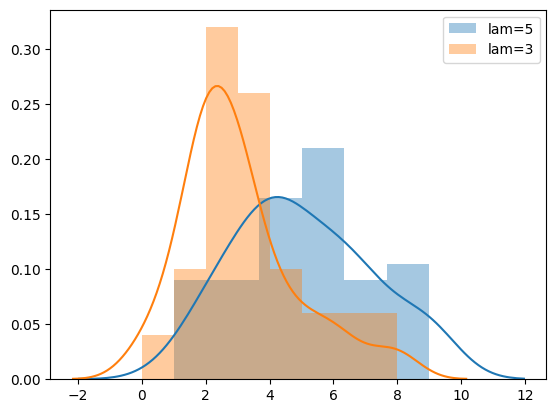

In [40]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.poisson(lam=5, size=50), kde=True, label="lam=5")
sns.distplot(random.poisson(lam=3, size=50), kde=True, label='lam=3')
plt.legend()
plt.show()

In [ ]:
#---------  Z Critical Value
z_critical_value_two = scipy.stats.norm.ppf(1-a/2) #<--- Two-tailed test
print("Critical Value:", "{:.3f}".format(z_critical_value_two))
#z_critical_value_left = scipy.stats.norm.ppf(a) #<--- Left-tailed test
#print("Left-tailed: z Critical Value:", "{:.3f}".format(z_critical_value_left))
#z_critical_value_right = scipy.stats.norm.ppf(1-a) #<--- Right-tailed test
#print("Right-tailed: z Critical Value:", "{:.3f}".format(z_critical_value_right))



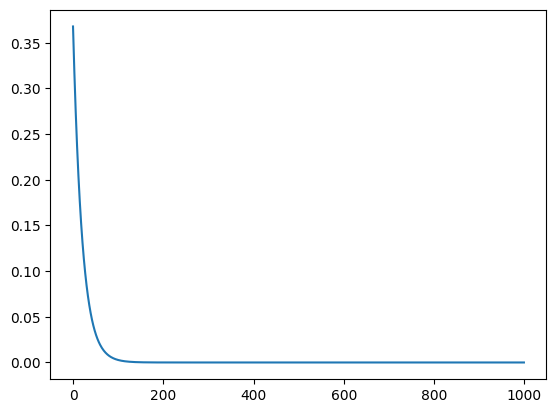

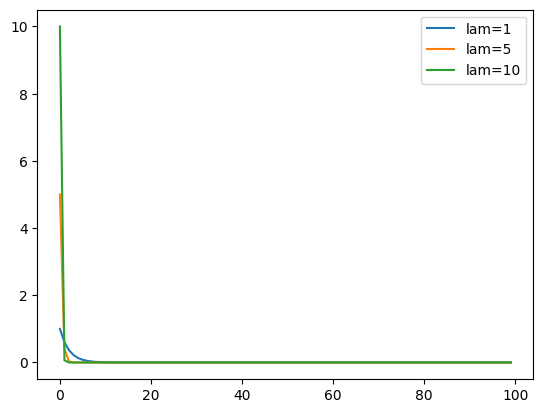